In [1]:
%matplotlib inline

In [2]:
import cv2
from scipy.misc import imread
import matplotlib.pyplot as plt
from pathlib import Path
import xml.etree.ElementTree as ET
import re
import numpy as np
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.io import imsave
import random
import pandas as pd
from sklearn.feature_extraction.image import extract_patches_2d


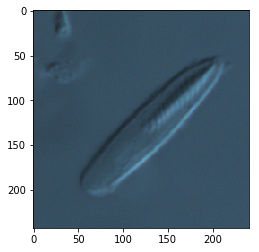

In [3]:
img = imread('cropped/0_samples_AnthopleuraPAN49@_filament_image0077.tif')
plt.imshow(img)

In [12]:
params = cv2.SimpleBlobDetector_Params()
#params.filterByCircularity = True
#params.minCircularity = 0.1

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs.
#keypoints = detector.detect(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
keypoints = detector.detect(cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)))
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
#cv2.imshow("Keypoints", im_with_keypoints)

keypoints

[]

In [6]:
keypoints

[]

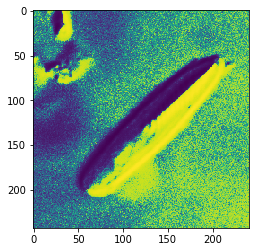

In [11]:
plt.imshow(cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)))

In [19]:
th3 = cv2.adaptiveThreshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

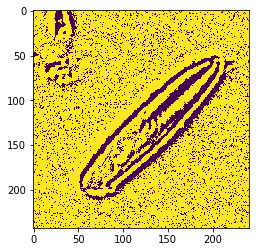

In [20]:
plt.imshow(th3)

In [21]:
params = cv2.SimpleBlobDetector_Params()
#params.filterByCircularity = True
#params.minCircularity = 0.1

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs.
#keypoints = detector.detect(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
keypoints = detector.detect(th3)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
#cv2.imshow("Keypoints", im_with_keypoints)

keypoints

[]

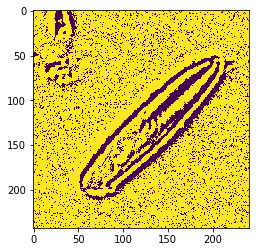

In [22]:
plt.imshow(cv2.equalizeHist(th3))

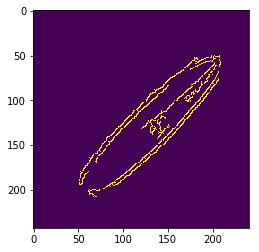

In [43]:
edges = cv2.Canny(img,25,200)
plt.imshow(edges)

35.87516375363579

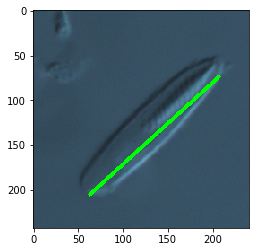

In [91]:
img = imread('cropped/0_samples_AnthopleuraPAN49@_filament_image0077.tif')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#gray = cv2.bilateralFilter(gray, 25, 1, 25)
edged = cv2.Canny(img, 25, 50, 3)

plt.imshow(edged)

im2, contours, hierarchy = cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#plt.imshow(im2)
#plt.imshow(cv2.drawContours(gray, contours, -1, (0,255,0), 3))

#for c in cnts:
# approximate the contour
c = sorted(contours, key = cv2.contourArea, reverse = True)[0]
peri = cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, 0.1 * peri, True)
cv2.drawContours(img, [approx], -1, (0, 255, 0), 3)
plt.imshow(img)

cv2.arcLength(approx, True)*9.2142813205739939e-08*1000000

In [90]:
cv2.arcLength(approx, True)*9.2142813205739939e-08*1000000

35.87516375363579

In [65]:
sorted(contours, key = cv2.contourArea, reverse = True)[:10]

[array([[[207,  74]],
 
        [[207,  75]],
 
        [[206,  76]],
 
        [[206,  77]],
 
        [[204,  79]],
 
        [[204,  81]],
 
        [[199,  86]],
 
        [[199,  87]],
 
        [[197,  89]],
 
        [[197,  90]],
 
        [[193,  94]],
 
        [[193,  95]],
 
        [[190,  98]],
 
        [[190,  99]],
 
        [[185, 104]],
 
        [[185, 105]],
 
        [[184, 106]],
 
        [[183, 106]],
 
        [[183, 107]],
 
        [[182, 108]],
 
        [[181, 108]],
 
        [[181, 109]],
 
        [[178, 112]],
 
        [[177, 112]],
 
        [[177, 113]],
 
        [[175, 115]],
 
        [[175, 116]],
 
        [[169, 122]],
 
        [[169, 123]],
 
        [[168, 124]],
 
        [[167, 124]],
 
        [[167, 125]],
 
        [[164, 128]],
 
        [[164, 129]],
 
        [[155, 138]],
 
        [[155, 139]],
 
        [[152, 142]],
 
        [[151, 142]],
 
        [[151, 143]],
 
        [[150, 144]],
 
        [[149, 143]],
 
        [[150, 1

In [48]:
contours

[array([[[44, 26]]], dtype=int32), array([[[30, 10]],
 
        [[29, 11]],
 
        [[28, 11]],
 
        [[28, 12]],
 
        [[29, 12]],
 
        [[30, 13]],
 
        [[30, 14]],
 
        [[31, 15]],
 
        [[31, 13]],
 
        [[30, 12]],
 
        [[31, 11]],
 
        [[31, 10]]], dtype=int32), array([[[39,  1]]], dtype=int32), array([[[  0,   0]],
 
        [[  0,   4]],
 
        [[  1,   5]],
 
        [[  0,   6]],
 
        [[  0,   9]],
 
        [[  1,  10]],
 
        [[  0,  11]],
 
        [[  0,  22]],
 
        [[  1,  23]],
 
        [[  0,  24]],
 
        [[  0,  32]],
 
        [[  1,  33]],
 
        [[  0,  34]],
 
        [[  0,  36]],
 
        [[  1,  37]],
 
        [[  0,  38]],
 
        [[  0,  39]],
 
        [[  1,  40]],
 
        [[  1,  41]],
 
        [[  0,  42]],
 
        [[  0,  46]],
 
        [[  2,  46]],
 
        [[  4,  48]],
 
        [[  4,  49]],
 
        [[  5,  48]],
 
        [[  6,  48]],
 
        [[  7,  49]],
 
        

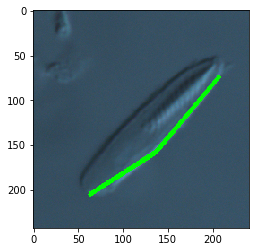

In [67]:
#for c in cnts:
# approximate the contour
c = sorted(contours, key = cv2.contourArea, reverse = True)[0]
peri = cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, 0.02 * peri, True)
cv2.drawContours(img, [approx], -1, (0, 255, 0), 3)
plt.imshow(img)

In [68]:
c

array([[[207,  74]],

       [[207,  75]],

       [[206,  76]],

       [[206,  77]],

       [[204,  79]],

       [[204,  81]],

       [[199,  86]],

       [[199,  87]],

       [[197,  89]],

       [[197,  90]],

       [[193,  94]],

       [[193,  95]],

       [[190,  98]],

       [[190,  99]],

       [[185, 104]],

       [[185, 105]],

       [[184, 106]],

       [[183, 106]],

       [[183, 107]],

       [[182, 108]],

       [[181, 108]],

       [[181, 109]],

       [[178, 112]],

       [[177, 112]],

       [[177, 113]],

       [[175, 115]],

       [[175, 116]],

       [[169, 122]],

       [[169, 123]],

       [[168, 124]],

       [[167, 124]],

       [[167, 125]],

       [[164, 128]],

       [[164, 129]],

       [[155, 138]],

       [[155, 139]],

       [[152, 142]],

       [[151, 142]],

       [[151, 143]],

       [[150, 144]],

       [[149, 143]],

       [[150, 144]],

       [[148, 146]],

       [[147, 146]],

       [[147, 147]],

       [[1

In [72]:
cv2.arcLength(c, True)

524.0802972316742

In [32]:
params = cv2.SimpleBlobDetector_Params()
#params.filterByCircularity = True
#params.minCircularity = 0.1

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs.
#keypoints = detector.detect(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
keypoints = detector.detect(edges)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
#cv2.imshow("Keypoints", im_with_keypoints)

keypoints

[]